In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv("../01. Data Preprocessing/data/standard_data.csv")

In [3]:
data

,raw_comment,standard_comment,label
0,"Lần đầu mua tại shop nhưng rất ưng ý, vải mặc ...",lần đầu tại vải mát lót đùi thun sớm mỗi sản b...,1
1,"Giao hàng nhanh, shop xịn xò đặt hàng xong là ...",nhanh xong chủ_động nhắn_tin xác_nhận gói mỗi ...,1
2,"Size vừa vặn luôn, shop mall mà hàng chất lượn...",vầy tội mu hả các bác giá_rẻ chất_lượng vừa_vặn,1
3,Sản phẩm chất lượng.đóng gói kĩ.shop nhiệt tìn...,kĩ nhiệt_tình lần cảm_ơn ủng_hộ đóng_gói chất_...,1
4,Chất lượng sản phẩm tuyệt vời giao hàng nhanh ...,nhanh dài_dài giao_hàng_nhanh ủng_hộ tuyệt_vời...,1
...,...,...,...
219591,Nơ xinh đúng chất công chúa đẹpppppp,nơ xinh đúng chất công_chúa đẹp,1
219592,"Rất dễ thương, đẹp",đẹp dễ_thương,1
219593,Đẹp lắm lun mọi ngừ ơi . Hdhhechhjhshxhdhhxhxh...,đẹp mọi ơi học mọi_người đẹp_lắm_luôn,1
219594,Mua 12 món giao đủ. Vừa rẻ vừa chất lượng rất ...,món đủ vừa rẻ vừa thích tiếp ủng_hộ chất_lượng...,1


In [4]:
data = shuffle(data)

In [5]:
data

,raw_comment,standard_comment,label
183692,Vải da mềm mịn màu đẹp nút gày chắc chắn. Mình...,vải da mềm mịn đẹp nút gày chắc_chắn áp mã vui,1
22563,"Ví đẹp dày dặn, giao hàng cực nhanh, 5 sao cho...",ví đẹp dày_dặn cực nhanh mọi giao_hàng nên_mua...,1
1197,Giao hàng nhanh…. Shop bọc gói sản phẩm khá ok...,nhanh bọc gói khá dùng giao_hàng_nhanh sản_phẩm,0
41919,Với giá tiền ntn thì sản phẩn cũg ổn rồi ạ,sản phẩn ổn giá_tiền cũng_ổn,1
148040,Kính nhỏ hơn hình huuu,kính nhỏ hình hu,1
...,...,...,...
41814,"Áo chất vải phì hợp giá tiền , cảm ơn shop đã ...",phì hợp cảm_ơn lì_xì giá_tiền chất_vải,1
83369,Áo may không đều. Chán,may đều chán,-1
155946,Chất lượng sản phẩm rất tốt và sẽ ủng hộ shop ...,tốt dài_dài ủng_hộ chất_lượng sản_phẩm 💛 ‼️,1
104025,Hơi to với mình một chút. Nhưng đẹp.,hơi to chút đẹp,1


In [6]:
tmp = data[['label', 'standard_comment']].groupby(['label']).count()

In [7]:
tmp

,standard_comment
label,
-1,3458
0,11845
1,204293


In [8]:
tmp = tmp['standard_comment'].to_list()

In [9]:
negative = data.label[data.label.eq(-1)].sample(tmp[0]).index
normal = data.label[data.label.eq(0)].sample(tmp[1]).index
positive = data.label[data.label.eq(1)].sample(tmp[1] + tmp[0]*2) .index

final_data = data.loc[negative.union(normal).union(positive)]

In [10]:
final_data

,raw_comment,standard_comment,label
4,Chất lượng sản phẩm tuyệt vời giao hàng nhanh ...,nhanh dài_dài giao_hàng_nhanh ủng_hộ tuyệt_vời...,1
42,Quần lót bên trong không có vải miếng vải cott...,lót trong vải miếng vải độ lõm đồ,-1
44,"Sản phẩm tốt, phù hợp với giá tiền, đóng gói s...",phù_hợp sản_phẩm đẹp nhanh giao_hàng_nhanh giá...,1
48,Chưa dùng nên mình tạm để 4 sao nha. Dùng rồi ...,chưa dùng tạm dùng cập_nhật,0
54,"Vải khá đẹp,giao cho bên vận chuyển nhanh.chưa...",vải vận_chuyển nhanh chưa tới ngày khá_đẹp,1
...,...,...,...
219574,Sản phẩm bị lỗi ở nút váy.,lỗi nút váy sản_phẩm,0
219575,Shop giao không đúng với mẫu,đúng mẫu không_đúng,-1
219576,đẹp lắm. Giao hàng mhanh. Phục vụ tốt,đẹp phục_vụ tốt giao_hàng,1
219580,K như mong muốn chỉ thừa nhiều vãi xoăn,mong_muốn thừa nhiều vải xoăn chỉ_thừa,0


In [11]:
final_data = final_data.reset_index(drop=True)

In [12]:
final_data

,raw_comment,standard_comment,label
0,Chất lượng sản phẩm tuyệt vời giao hàng nhanh ...,nhanh dài_dài giao_hàng_nhanh ủng_hộ tuyệt_vời...,1
1,Quần lót bên trong không có vải miếng vải cott...,lót trong vải miếng vải độ lõm đồ,-1
2,"Sản phẩm tốt, phù hợp với giá tiền, đóng gói s...",phù_hợp sản_phẩm đẹp nhanh giao_hàng_nhanh giá...,1
3,Chưa dùng nên mình tạm để 4 sao nha. Dùng rồi ...,chưa dùng tạm dùng cập_nhật,0
4,"Vải khá đẹp,giao cho bên vận chuyển nhanh.chưa...",vải vận_chuyển nhanh chưa tới ngày khá_đẹp,1
...,...,...,...
34059,Sản phẩm bị lỗi ở nút váy.,lỗi nút váy sản_phẩm,0
34060,Shop giao không đúng với mẫu,đúng mẫu không_đúng,-1
34061,đẹp lắm. Giao hàng mhanh. Phục vụ tốt,đẹp phục_vụ tốt giao_hàng,1
34062,K như mong muốn chỉ thừa nhiều vãi xoăn,mong_muốn thừa nhiều vải xoăn chỉ_thừa,0


🚩 Thực hiện tfidf

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
# tf_idf = TfidfVectorizer(min_df=10, max_df=0.8, max_features=5000, sublinear_tf=True)
tf_idf = TfidfVectorizer(ngram_range=(1, 4))
tf_idf.fit(final_data['standard_comment'])
X = tf_idf.transform(final_data['standard_comment'])

In [15]:
X.shape

(34064, 486151)

In [16]:
y = final_data['label']

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, shuffle=True)

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pre = model.predict(X_test)

/home/manhcuong/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

          -1       0.73      0.20      0.32       661
           0       0.64      0.68      0.66      2400
           1       0.80      0.87      0.83      3752

    accuracy                           0.74      6813
   macro avg       0.72      0.58      0.60      6813
weighted avg       0.74      0.74      0.72      6813



<hr>

🚩 Over-sampling

In [21]:
from imblearn.over_sampling import RandomOverSampler

In [22]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [23]:
X_ros.shape

(56283, 486151)

In [24]:
from collections import Counter

In [25]:
print(Counter(y_ros))

Counter({1: 18761, -1: 18761, 0: 18761})


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=10, shuffle=True)

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pre = model.predict(X_test)

/home/manhcuong/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

          -1       0.90      0.97      0.93      3751
           0       0.79      0.79      0.79      3663
           1       0.86      0.80      0.83      3843

    accuracy                           0.85     11257
   macro avg       0.85      0.85      0.85     11257
weighted avg       0.85      0.85      0.85     11257



In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
cm = confusion_matrix(y_test,y_pre)

In [31]:
cm

array([[3636,   81,   34],
       [ 336, 2879,  448],
       [  78,  683, 3082]])

# -1

In [32]:
group_neg = final_data[final_data['label'] == -1]['standard_comment']

In [33]:
tmp_neg = " ".join(group_neg.to_list())

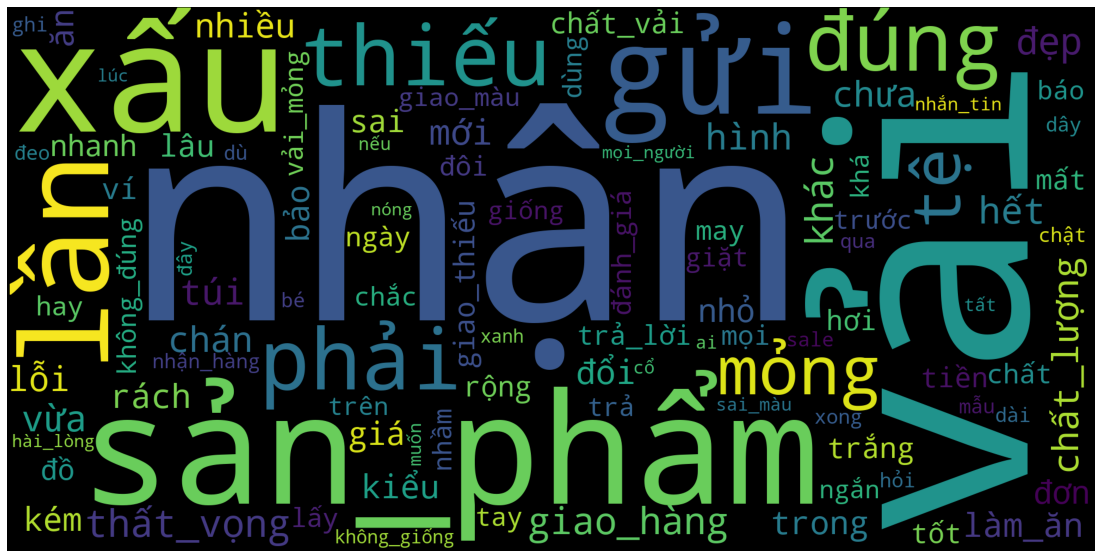

In [34]:
import wordcloud
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
word_cloud = wordcloud.WordCloud(max_words=100,background_color ="black",
                               width=2000,height=1000,mode="RGB").generate(str(tmp_neg))
plt.axis("off")
plt.imshow(word_cloud)

# 0

In [35]:
group_neu = final_data[final_data['label'] == 0]['standard_comment']

In [36]:
tmp_neu = " ".join(group_neu.to_list())

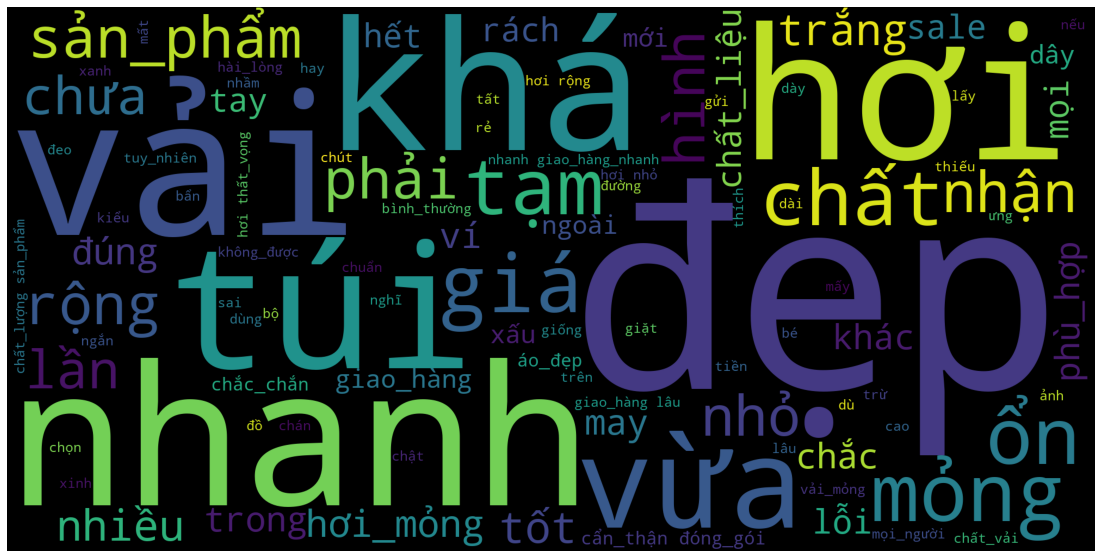

In [37]:
plt.figure(figsize=(20,10))
word_cloud = wordcloud.WordCloud(max_words=100,background_color ="black",
                               width=2000,height=1000,mode="RGB").generate(str(tmp_neu))
plt.axis("off")
plt.imshow(word_cloud)

# 1

In [38]:
group_pos = final_data[final_data['label'] == 1]['standard_comment']

In [39]:
tmp_pos = " ".join(group_pos.to_list())

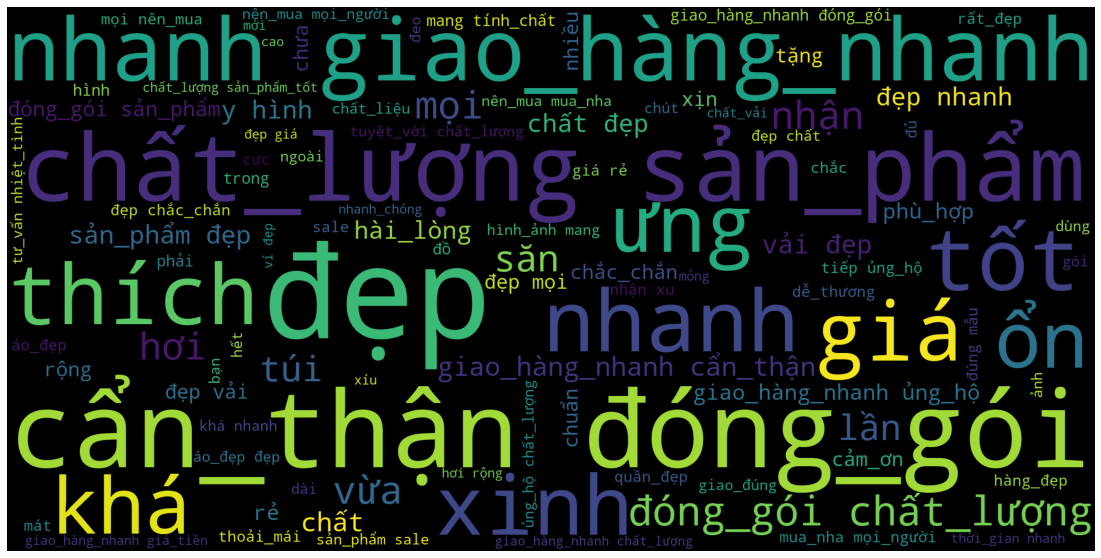

In [40]:
plt.figure(figsize=(20,10))
word_cloud = wordcloud.WordCloud(max_words=100,background_color ="black",
                               width=2000,height=1000,mode="RGB").generate(str(tmp_pos))
plt.axis("off")
plt.imshow(word_cloud)